learning rate
Finished epoch 100/1000: loss 0.633784, lr: 1.000000
Finished epoch 200/1000: loss 0.632926, lr: 1.000000
Finished epoch 300/1000: loss 0.632635, lr: 1.000000
Finished epoch 400/1000: loss 0.632489, lr: 1.000000
Finished epoch 500/1000: loss 0.632401, lr: 1.000000
Finished epoch 600/1000: loss 0.632343, lr: 1.000000
Finished epoch 700/1000: loss 0.632302, lr: 1.000000
Finished epoch 800/1000: loss 0.632271, lr: 1.000000
Finished epoch 900/1000: loss 0.632247, lr: 1.000000
Finished epoch 1000/1000: loss 0.632228, lr: 1.000000
Finished epoch 100/1000: loss 0.039047, lr: 0.010000
Finished epoch 200/1000: loss 0.012977, lr: 0.010000
Finished epoch 300/1000: loss 0.007552, lr: 0.010000
Finished epoch 400/1000: loss 0.005285, lr: 0.010000
Finished epoch 500/1000: loss 0.004054, lr: 0.010000
Finished epoch 600/1000: loss 0.003283, lr: 0.010000
Finished epoch 700/1000: loss 0.002757, lr: 0.010000
Finished epoch 800/1000: loss 0.002375, lr: 0.010000
Finished epoch 900/1000: loss 0

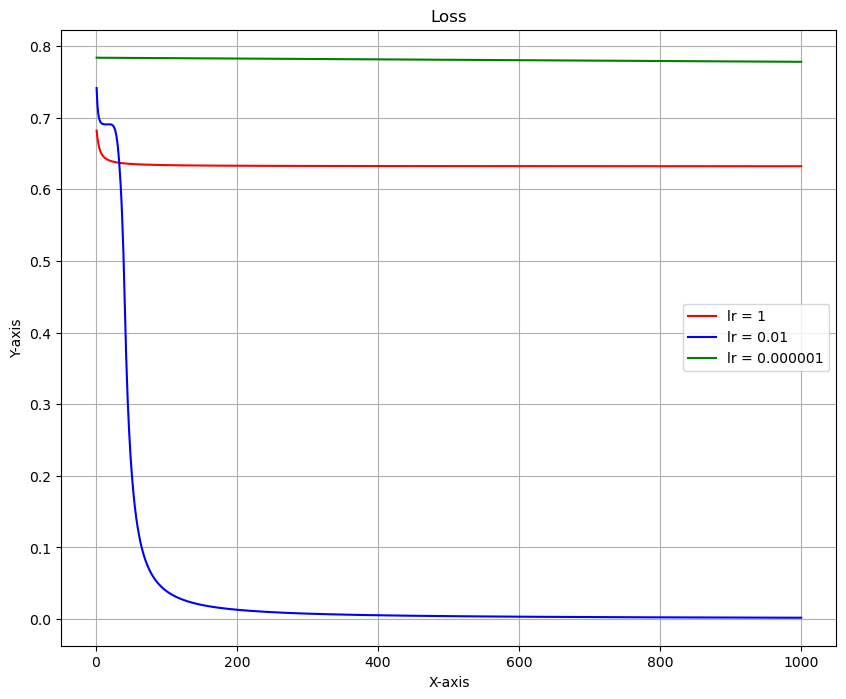

number of epochs
Finished epoch 100/100: loss 0.520788, lr: 0.014000


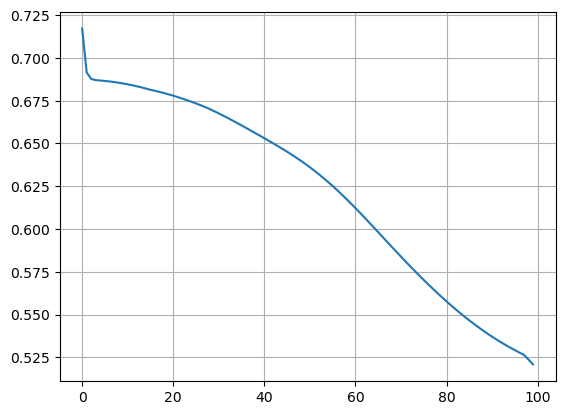

Finished epoch 100/1500: loss 0.520788, lr: 0.014000
Finished epoch 200/1500: loss 0.449299, lr: 0.014000
Finished epoch 300/1500: loss 0.447650, lr: 0.014000
Finished epoch 400/1500: loss 0.446947, lr: 0.014000
Finished epoch 500/1500: loss 0.446699, lr: 0.014000
Finished epoch 600/1500: loss 0.446592, lr: 0.014000
Finished epoch 700/1500: loss 0.446502, lr: 0.014000
Finished epoch 800/1500: loss 0.446456, lr: 0.014000
Finished epoch 900/1500: loss 0.446406, lr: 0.014000
Finished epoch 1000/1500: loss 0.446314, lr: 0.014000
Finished epoch 1100/1500: loss 0.446219, lr: 0.014000
Finished epoch 1200/1500: loss 0.446172, lr: 0.014000
Finished epoch 1300/1500: loss 0.446099, lr: 0.014000
Finished epoch 1400/1500: loss 0.446026, lr: 0.014000
Finished epoch 1500/1500: loss 0.445999, lr: 0.014000


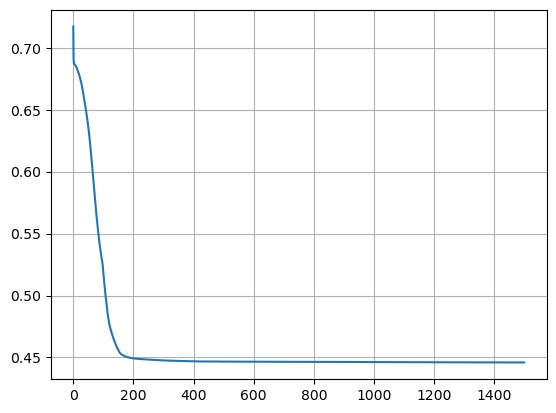

Finished epoch 100/15000: loss 0.520788, lr: 0.014000
Finished epoch 200/15000: loss 0.449299, lr: 0.014000
Finished epoch 300/15000: loss 0.447650, lr: 0.014000
Finished epoch 400/15000: loss 0.446947, lr: 0.014000
Finished epoch 500/15000: loss 0.446699, lr: 0.014000
Finished epoch 600/15000: loss 0.446592, lr: 0.014000
Finished epoch 700/15000: loss 0.446502, lr: 0.014000
Finished epoch 800/15000: loss 0.446456, lr: 0.014000
Finished epoch 900/15000: loss 0.446406, lr: 0.014000
Finished epoch 1000/15000: loss 0.446314, lr: 0.014000
Finished epoch 1100/15000: loss 0.446219, lr: 0.014000
Finished epoch 1200/15000: loss 0.446172, lr: 0.014000
Finished epoch 1300/15000: loss 0.446099, lr: 0.014000
Finished epoch 1400/15000: loss 0.446026, lr: 0.014000
Finished epoch 1500/15000: loss 0.445999, lr: 0.014000
Finished epoch 1600/15000: loss 0.445941, lr: 0.014000
Finished epoch 1700/15000: loss 0.445889, lr: 0.014000
Finished epoch 1800/15000: loss 0.445856, lr: 0.014000
Finished epoch 1900

Finished epoch 15000/15000: loss 0.445428, lr: 0.014000


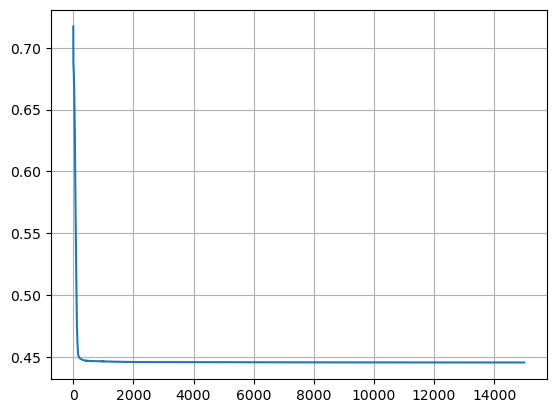

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import mock_data 
import utilities as tool
import mlp
import importlib

importlib.reload(mock_data)
importlib.reload(mlp)
importlib.reload(tool)

# 创建数据集
data = mock_data.MockData()
dataSet1, labels1 = data.create_linear_data()
dataSet2, labels2 = data.create_stochastic_data()
train_input1, test_input1, train_target1, test_target1 = train_test_split(dataSet1, labels1, test_size = 0.2)
train_input2, test_input2, train_target2, test_target2 = train_test_split(dataSet2, labels2, test_size = 0.2)

# 不同lr对实验结果的影响
input_dim = 2
layer_num = 2
bn_mode = False
tol = None
optimize_type = 0
batch_size = 1
epoch_num = 1000
unit_num = [3,1]
reg = 0

print('learning rate')
learning_rate = 1
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input1, train_target1, epoch_num, learning_rate, tol, optimize_type, batch_size, bn_mode)
loss1 = model.return_loss()

learning_rate = 0.01
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input1, train_target1, epoch_num, learning_rate, tol, optimize_type, batch_size, bn_mode)
loss2 = model.return_loss()

learning_rate = 0.000001
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input1, train_target1, epoch_num, learning_rate, tol, optimize_type, batch_size, bn_mode)
loss3 = model.return_loss()

iteration = [i for i in range(1, epoch_num + 1)]
loss = [
    {'x': iteration, 'y': loss1, 'label': 'lr = 1', 'color': 'red'},
    {'x': iteration, 'y': loss2, 'label': 'lr = 0.01', 'color': 'blue'},
    {'x': iteration, 'y': loss3, 'label': 'lr = 0.000001', 'color': 'green'}
]
tool.plot_loss(loss)

# 不同epoch_num对实验结果的影响
print('number of epochs')
layer_num = 6
unit_num = [15, 12, 9, 6, 3, 1]
learning_rate = 0.014

epoch_num = 100
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input2, train_target2, epoch_num, learning_rate, tol, optimize_type, batch_size, reg, bn_mode)
model.plot_loss()

epoch_num = 1500
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input2, train_target2, epoch_num, learning_rate, tol, optimize_type, batch_size, reg, bn_mode)
model.plot_loss()

epoch_num = 15000
model = mlp.MLP(input_dim, layer_num, unit_num)
model.train(train_input2, train_target2, epoch_num, learning_rate, tol, optimize_type, batch_size, reg, bn_mode)
model.plot_loss()